<a href="https://colab.research.google.com/github/domon59/Test/blob/master/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
score_df = pd.read_csv('/content/StudentsPerformance.csv')
score_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# rename columns
score_df.rename(columns={'race/ethnicity':'race','parental level of education':'parent_education','test preparation course':'pre_test','math score':'math','reading score':'reading','writing score':'writing'}, inplace=True)

In [ ]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   race              1000 non-null   object
 2   parent_education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   pre_test          1000 non-null   object
 5   math              1000 non-null   int64 
 6   reading           1000 non-null   int64 
 7   writing           1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
score_df.select_dtypes(include='object').nunique()

gender              2
race                5
parent_education    6
lunch               2
pre_test            2
dtype: int64

In [ ]:
# Analysis Gender effect on score
gender_df = score_df[['gender','math','reading','writing']]
gender_df_avg=gender_df.groupby('gender').mean()
gender_df_avg


,math,reading,writing
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


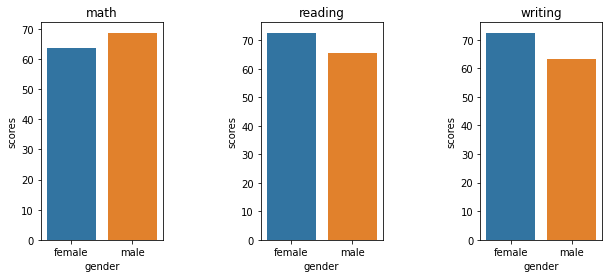

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left =0.2, right = 1.5)
for idx in range(3):
  plt.subplot(1,3, idx+1)
  gender_df = score_df.groupby('gender')[list(score_df.columns[-3:])[idx]].mean()
  sns.barplot(gender_df.index,gender_df.values)
  plt.ylabel('Mean scores')
  plt.title(list(score_df.columns[-3:])[idx])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


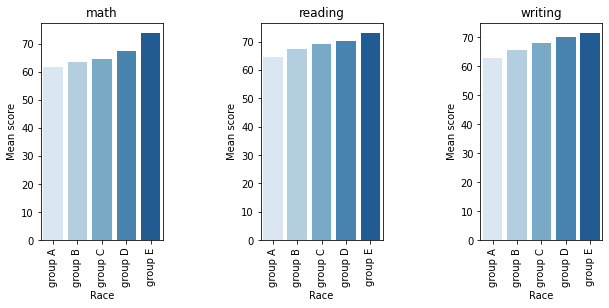

In [ ]:
#Analysis race effect on scores
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left =0.2, right = 1.5)
for idx in range(3):
  plt.subplot(1,3,idx+1)
  race_df = score_df.groupby('race')[list(score_df.columns[-3:])[idx]].mean()
  sns.barplot(race_df.index, race_df.values,palette ='Blues')
  plt.xlabel('Race')
  plt.ylabel('Mean score')
  plt.xticks(rotation = 90)
  plt.title(list(score_df.columns[-3:])[idx])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


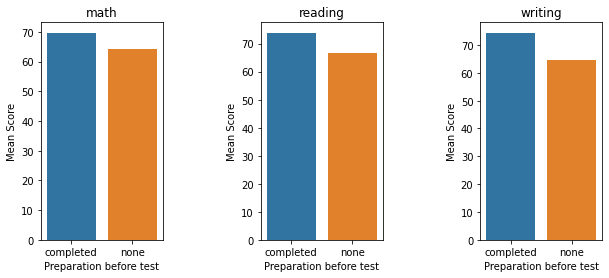

In [ ]:
# Analysis Pre_test effect
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left =0.2, right = 1.5)
for idx in range(3):
  plt.subplot(1,3,idx+1)
  pre_test_df = score_df.groupby('pre_test')[list(score_df.columns[-3:])[idx]].mean()
  sns.barplot(pre_test_df.index, pre_test_df.values)
  plt.xlabel('Preparation before test')
  plt.ylabel('Mean Score')
  plt.title(list(score_df.columns[-3:])[idx])

plt.show()

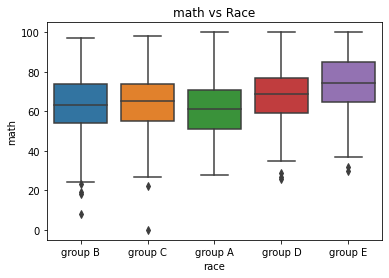

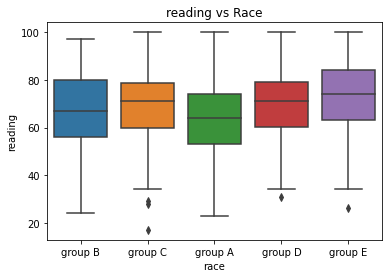

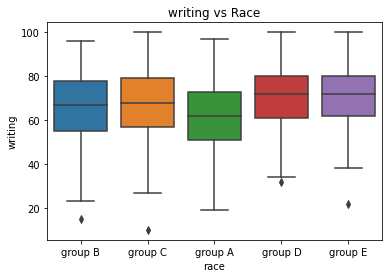

In [ ]:
#find the outline
'''
sns.boxplot(x=score_df['race'], y =score_df['math'])
plt.show()
'''
for item in score_df.columns[-3:]:
  sns.boxplot(x=score_df['race'], y = score_df[item])
  plt.title( item + ' vs Race')
  plt.show()


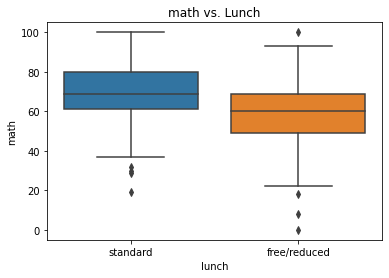

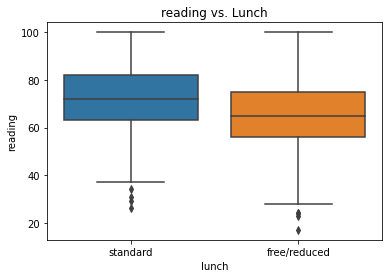

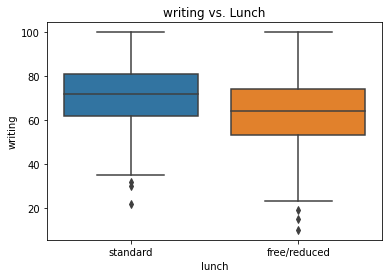

In [ ]:
for item in score_df.columns[-3:]:
  sns.boxplot(x=score_df['lunch'], y=score_df[item])
  plt.title(item+ " vs. Lunch")
  plt.show()

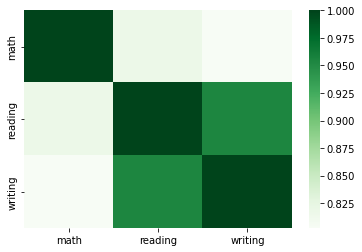

In [ ]:
# Correlation map 
sns.heatmap(score_df.corr(), cmap='Greens')

In [ ]:
# Transfer some features by label encoder
labelencoder = LabelEncoder()
train_df = score_df.copy()
train_df['parent_education'] = labelencoder.fit_transform(train_df['parent_education'])
train_df['pre_test']= labelencoder.fit_transform(train_df['pre_test'])
train_df['race']=labelencoder.fit_transform(train_df['race'])
train_df['lunch']=labelencoder.fit_transform(train_df['lunch'])
train_df['gender'] =labelencoder.fit_transform(train_df['gender'])

In [ ]:
train_df.head()

,gender,race,parent_education,lunch,pre_test,math,reading,writing,classification,avg_score
0,0,1,1,1,1,72,72,74,2,72.666667
1,0,2,4,1,0,69,90,88,2,82.333333
2,0,1,3,1,1,90,95,93,3,92.666667
3,1,0,0,0,1,47,57,44,7,49.333333
4,1,2,4,1,1,76,78,75,2,76.333333


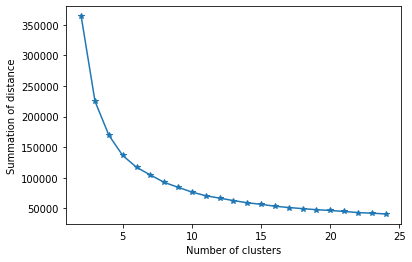

In [ ]:
# Use KMeans to classifiy the dataset
kmeans_dis =list()
for idx in range(2, 25):
  kmeans = KMeans(n_init=20, n_clusters=idx)
  kmeans.fit_transform(train_df.iloc[:])
  kmeans_dis.append(kmeans.inertia_)

plt.plot(list(range(2,25)), kmeans_dis, marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('Summation of distance')

plt.show()


In [ ]:
# Through picture, 8 is choosen as elbow point, then classify all data 
kmeans = KMeans(n_init=20, n_clusters=7)
kmeans.fit_transform(train_df.iloc[:,1:])
kmeans_label = kmeans.labels_
score_df['classification']=kmeans_label
score_df.head()


,gender,race,parent_education,lunch,pre_test,math,reading,writing,classification,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,6,72.666667
1,female,group C,some college,standard,completed,69,90,88,5,82.333333
2,female,group B,master's degree,standard,none,90,95,93,1,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,2,49.333333
4,male,group C,some college,standard,none,76,78,75,5,76.333333


In [ ]:
#calculate average score
score_df['avg_score']=(score_df['math']+score_df['reading']+score_df['writing'])/3
score_df.head()

,gender,race,parent_education,lunch,pre_test,math,reading,writing,classification,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,2,72.666667
1,female,group C,some college,standard,completed,69,90,88,2,82.333333
2,female,group B,master's degree,standard,none,90,95,93,3,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,7,49.333333
4,male,group C,some college,standard,none,76,78,75,2,76.333333


In [ ]:
#get dummies
X_features_df = score_df.drop(['math','reading','writing','classification', 'avg_score'], axis =1 )
X_features_encoded = X_features_df.apply(lambda x: x.astype('category'))
X_features_encoded = pd.get_dummies(X_features_encoded,drop_first=True)
X_features_encoded

,gender_male,race_group B,race_group C,race_group D,race_group E,parent_education_bachelor's degree,parent_education_high school,parent_education_master's degree,parent_education_some college,parent_education_some high school,lunch_standard,pre_test_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,0,1,0,0,1,0
996,1,0,1,0,0,0,1,0,0,0,0,1
997,0,0,1,0,0,0,1,0,0,0,0,0
998,0,0,0,1,0,0,0,0,1,0,1,0


In [ ]:
target = score_df['avg_score']
X_train, X_val, y_train, y_val = train_test_split(X_features_encoded, target, test_size=0.6, shuffle=True, random_state=42)


In [ ]:
#Modeling
def calculateModel(real, prediction):
  rmse = np.sqrt(mean_squared_error(real,prediction))
  r2 = r2_score(real, prediction)
  print('rmse', rmse)
  print('r2 score', r2)

In [ ]:
# Random Forest
rf = RandomForestRegressor(random_state=42).fit(X_train,y_train)
rf_pred= rf.predict(X_train)
print("Train Set of RF")
calculateModel(y_train, rf_pred)

print("--------------")
print("Val set of RF")
rf_val_pred = rf.predict(X_val)
calculateModel(y_val, rf_val_pred)

Train Set of RF
rmse 9.855989590934053
r2 score 0.4919132581286936
--------------
Val set of RF
rmse 14.402700380763841
r2 score 0.013498226003153424


In [ ]:
#LinearRegression
lg = LinearRegression(normalize=True).fit(X_train,y_train)
lg_pred = lg.predict(X_train)
print("Train Set of LR")
calculateModel(y_train, lg_pred)

print("--------------")
print("Val set of LR")
lg_val_pred = lg.predict(X_val)
calculateModel(y_val, lg_val_pred)


Train Set of LR
rmse 1.3755013613523161e-14
r2 score 1.0
--------------
Val set of LR
rmse 1.4133669640003833e-14
r2 score 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
#Use train_df modeling 
train_df['classification'] = kmeans.labels_
train_df['avg_score'] = (train_df['math']+train_df['reading']+train_df['writing'])/3
train_df.head()

,gender,race,parent_education,lunch,pre_test,math,reading,writing,classification,avg_score
0,0,1,1,1,1,72,72,74,6,72.666667
1,0,2,4,1,0,69,90,88,5,82.333333
2,0,1,3,1,1,90,95,93,1,92.666667
3,1,0,0,0,1,47,57,44,2,49.333333
4,1,2,4,1,1,76,78,75,5,76.333333


In [ ]:
target = train_df.pop('avg_score')
X_train,X_val, y_train, y_val = train_test_split(train_df, target,test_size=0.6, random_state=42)

In [ ]:
rf = RandomForestRegressor(random_state=42).fit(X_train,y_train)
rf_pred= rf.predict(X_train)
print("Train Set of RF")
calculateModel(y_train, rf_pred)

print("--------------")
print("Val set of RF")
rf_val_pred = rf.predict(X_val)
calculateModel(y_val, rf_val_pred)

Train Set of RF
rmse 0.4386170184670094
r2 score 0.9989937443149721
--------------
Val set of RF
rmse 1.3313708335006793
r2 score 0.9915703780985541


In [ ]:
#LinearRegression
lg = LinearRegression(normalize=True).fit(X_train,y_train)
lg_pred = lg.predict(X_train)
print("Train Set of LinearRegression")
calculateModel(y_train, lg_pred)

print("--------------")
print("Val set of LinearRegression")
lg_val_pred = lg.predict(X_val)
calculateModel(y_val, lg_val_pred)

Train Set of LinearRegression
rmse 1.3755013613523161e-14
r2 score 1.0
--------------
Val set of LinearRegression
rmse 1.4133669640003833e-14
r2 score 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
